# k近邻法
1.k近邻算法是基本且简单的分类与回归方法。k近邻法的基本做法是：对给定的训练实例点和输入实例点，首先确定输入实例点的k个最近邻训练实例点，然后利用这k个训练实例点的类的多数来预测输入实例点的类
2. k近邻模型对于基于训练数据集对特征空间的一个划分。k近邻法中，当训练集、距离度量、k值及分类决策规则确定后，其结果唯一确定。
3. k近邻法的三要素：距离度量、k值的选择和分类决策规则。常用的距离度量是欧氏距离及一般的PL距离。k值小时，k近邻模型更复杂；k值大时，k近邻模型更简单。k值的选择反映了对近似误差与估计误差之间的权衡，通常有交叉验证选择最优的k。
常用的分类决策规则是多数表决，对应于经验风险最小化。
4. k近邻法的实现需要考虑如何快速搜索k个最近邻点。**kd树**是一种便于对k维空间中的数据进行快速检索的数据结构。kd树是二叉树，表示对k维空间的一部分，其每个节点对应于k维空间划分中的一个超矩形区域。利用kd树可以省去对大部分数据点的搜索，从而减少搜索的计算量。
### 距离度量
设特征空间x是n维实数向量空间，$x_i,x_j \in \chi, x_i = (x_i^{(1)},x_i^{(2)},\cdots, x_i^{(n)}),x_j = (x_j^{(1)},x_j^{(2)},\cdots, x_j^{(n)})$,则：$x_i,x_j$的$L_p$的距离定义为：
$$L_p(x_i,x_j) = (\sum _{i=1}^{n}\mid x_i^{(i)}-x_j^{(j)}\mid ^p)^{\frac {1}{p}}$$
**p = 1 曼哈顿距离**
**p = 2 欧式距离**
**p = ∞ 切比雪夫距离**

In [1]:
import math
from itertools import combinations

In [2]:
def L(x, y, p=2):
    #x1 = [1, 1], x2 = [5,1]
    if len(x) == len(y) and len(x) > 1:
        sum = 0
        for i in range(len(x)):
            sum += math.pow(abs(x[i]-y[i]), p)
        return math.pow(sum, 1/p)
    else:
        return 0
                       

In [3]:
x1 = [1,1]
x2 = [5,1]
x3 = [4,4]

In [9]:
# x1,x2
for i in range(1,5):
    r = {'{}-{}'.format(x1, c):L(x1,c,p=i) for c in [x2,x3]}
#     print(r)
    print(min(zip(r.values(),r.keys())))

(4.0, '[1, 1]-[5, 1]')
(4.0, '[1, 1]-[5, 1]')
(3.7797631496846193, '[1, 1]-[4, 4]')
(3.5676213450081633, '[1, 1]-[4, 4]')


* python 实现,遍历所有数据点，找出n个距离最近的点的分类情况，少数服从多数

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [12]:
# data
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.head(60)

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


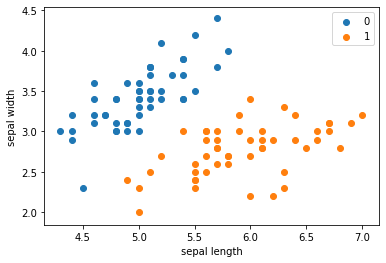

In [13]:
plt.scatter(df[:50]['sepal length'],df[:50]['sepal width'], label = '0')
plt.scatter(df[50:100]['sepal length'],df[50:100]['sepal width'], label = '1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [23]:
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)
print(X_test)
print(y_test)

[[5.8 2.7]
 [6.3 2.3]
 [5.1 3.4]
 [5.  3.2]
 [4.3 3. ]
 [6.3 3.3]
 [5.7 4.4]
 [5.5 2.4]
 [5.5 2.6]
 [4.7 3.2]
 [6.9 3.1]
 [5.4 3.4]
 [5.  3.6]
 [5.5 4.2]
 [4.5 2.3]
 [5.6 2.9]
 [5.4 3. ]
 [5.5 2.4]
 [5.7 2.8]
 [5.4 3.4]]
[1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0.]


In [24]:
class KNN:
    def __init__(self, X_train, y_train, n_neighbors=3, p=2):
        """
        parameters:n_neighbors 临近近点个数
        parameters:p 距离度量
        """
        self.n = n_neighbors
        self.p = p
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self,X):
        #取出n个点
        knn_list = []
        for i in range(self.n):
            dist = np.linalg.norm(X - self.X_train[i], ord = self.p)
            knn_list.append((dist, self.y_train[i]))
        
        for i in range(self.n, len(self.X_train)):
            max_index = knn_list.index(max(knn_list, key = lambda x:x[0]))
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            if knn_list[max_index][0] > dist:
                knn_list[max_index] = (dist, self.y_train[i])
        
        #统计
        knn = [k[-1] for k in knn_list]
        count_pairs = Counter(knn)
        max_count = sorted(count_pairs.items(),key=lambda x:x[1])[-1][0]
        return max_count
    def score(self,X_test, y_test):
        right_count = 0
        n = 10
        for X, y in zip(X_test,y_test):
            label = self.predict(X)
            if label == y:
                right_count += 1
        return right_count / len(X_test)

In [25]:
clf = KNN(X_train,y_train)
clf.score(X_test,y_test)


0.95